<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [56]:
##### Your Code Here #####
import pandas as pd

from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()


In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [58]:
X_train.max()

711.0

In [59]:
y_train.max()

50.0

In [60]:
print(X_test.max())
print(y_test.max())

711.0
50.0


In [61]:
# Normalize the data
import numpy as np

X_train = X_train / np.amax(X_train, axis=0)
X_test = X_test / np.amax(X_test, axis=0)
y_train = y_train / 50
y_test = y_test / 50

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Instantiate our model
model = Sequential()
# Add a Dense layer where all the nodes are connected between layers
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Add a Compile method; which is how we want to train/teach the dataset
model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['mse'])
# print model summary
print(model.summary())
# Fit the model using training data
model.fit(X_train, y_train, epochs=150)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_6 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 14        
Total params: 560
Trainable params: 560
Non-trainable params: 0
_________________________________________________________________
None
Train on 404 samples
Epoch 1/150
404/404 [==============================] - 1s 1ms/sample - loss: 54.0801 - mse: 0.0441
Epoch 2/150
404/404 [==============================] - 0s 71us/sample - loss: 44.3687 - mse: 0.0362
Epoch 3/150
404/404 [========

In [17]:
model.evaluate(X_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[17.62836145887188, 0.013626934]

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
# linear regression model is slightly better than our shallow neural network. Could probably optimize parameters
# of the nn to increase performance.

In [15]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.011061914812243794
Mean Absolute Error: 0.07682752483087278


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [1]:
##### Your Code Here #####
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
X_train[:].max()

255

In [5]:
# data processing and normalization
import numpy as np
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train = X_train / np.amax(X_train, axis=0)
X_test = X_test / np.amax(X_test, axis=0)

In [6]:
# more data processing
import keras
# converting class vectors(integers) to categorical classes
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Using TensorFlow backend.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Instantiate our model
mnist_model = Sequential()
# Add a Dense layer where all the nodes are connected between layers
mnist_model.add(Dense(500, input_dim=784, activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Dense(500, activation='relu'))
mnist_model.add(Dropout(0.2))
# Output
mnist_model.add(Dense(10,activation='softmax'))
# Add a Compile method; which is how we want to train/teach the dataset
mnist_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# print model summary
print(mnist_model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_8 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_9 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
history = mnist_model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1)
scores = mnist_model.evaluate(X_test, y_test)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 16s 269us/sample - loss: 0.5541 - accuracy: 0.8043
Epoch 2/15
60000/60000 [==============================] - 16s 259us/sample - loss: 0.4810 - accuracy: 0.8424
Epoch 3/15
60000/60000 [==============================] - 16s 265us/sample - loss: 0.4753 - accuracy: 0.8486
Epoch 4/15
60000/60000 [==============================] - 16s 268us/sample - loss: 0.4736 - accuracy: 0.8536
Epoch 5/15
60000/60000 [==============================] - 16s 258us/sample - loss: 0.4778 - accuracy: 0.8536
Epoch 6/15
60000/60000 [==============================] - 16s 264us/sample - loss: 0.4735 - accuracy: 0.8561
Epoch 7/15
60000/60000 [==============================] - 16s 269us/sample - loss: 0.4847 - accuracy: 0.8557
Epoch 8/15
60000/60000 [==============================] - 16s 270us/sample - loss: 0.4795 - accuracy: 0.8592
Epoch 9/15
60000/60000 [==============================] - 16s 264us/sample - loss: 0.4828 - accuracy: 0.8

In [19]:
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

accuracy: 86.40000224113464


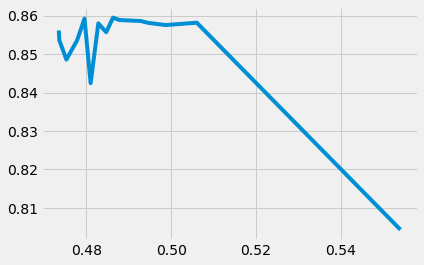

In [41]:
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
sns.lineplot(x=history.history['loss'], y=history.history['accuracy']);

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.